## Libraries

In [1]:
import pandas as pd
import random
import operator

## Data Frame extraction

In [2]:
df = pd.read_csv("G:/My Projects/If_it_fits_your_maccies/menu.csv")

In [3]:
df.shape

(260, 24)

In [4]:
df.shape[0]

260

In [5]:
menusize = df.shape[0]

In [6]:
menusize

260

In [40]:
df.head()


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [42]:
df_macro = df[["Item", "Total Fat", "Carbohydrates", "Protein"]]

In [45]:
item_list = df_macro["Item"].tolist()
fats = df_macro["Total Fat"].tolist()
carbs = df_macro["Carbohydrates"].tolist()
prot = df_macro["Protein"].tolist()

In [47]:
type(fats[1])

float

In [61]:
def fitness(gene, target):
    total_carbs = 0.0
    total_fats = 0.0
    total_protein = 0.0
    index = 0
    for i in gene:
        
        total_carbs += (i * carbs[i])
        total_fats += (i * fats[i])
        total_protein += (i * prot[i])
        index += 1
    score = ((target[0] - total_carbs)**2 +
            (target[1] - total_fats)**2 +
            (target[2] - total_protein)**2)
    return score

In [59]:
scaledFitness([2,4,3,5,7,2,3,5,3,6,1,6], tarNut)

3596129.0

### Fitness

## initial pop

In [7]:
def generateChild(chromNumber):
    gene = []
    for i in range(chromNumber):
        chrom = random.randint(0,5)
        gene.append(chrom)
    return gene



In [8]:
def generatePop(popSize, chromSize):
    population = []
    i = 0
    while i < popSize:
        population.append(generateChild(chromSize))
        i+=1
    #population.pop(len(population))
    print(population)
    return population

In [9]:
generatePop(100, 10)

[[0, 1, 5, 0, 0, 3, 5, 4, 4, 1], [3, 5, 4, 2, 3, 4, 1, 2, 2, 1], [2, 5, 5, 3, 2, 5, 1, 1, 0, 5], [0, 2, 1, 1, 4, 2, 2, 4, 5, 1], [4, 5, 5, 5, 0, 2, 1, 3, 1, 0], [2, 2, 3, 0, 1, 4, 0, 5, 1, 3], [5, 0, 0, 1, 5, 0, 1, 5, 0, 0], [3, 3, 3, 4, 0, 2, 0, 5, 5, 0], [4, 3, 4, 0, 1, 2, 0, 3, 4, 4], [1, 1, 4, 1, 1, 3, 1, 4, 4, 0], [3, 3, 3, 5, 4, 2, 2, 5, 4, 4], [3, 2, 4, 1, 5, 3, 4, 0, 2, 1], [5, 2, 4, 1, 2, 3, 0, 2, 5, 5], [3, 3, 0, 4, 2, 3, 0, 5, 4, 3], [1, 5, 2, 3, 4, 1, 0, 0, 4, 4], [5, 4, 3, 0, 5, 1, 2, 4, 2, 1], [4, 3, 5, 3, 5, 1, 0, 1, 2, 2], [3, 1, 2, 5, 5, 1, 4, 0, 2, 5], [4, 4, 1, 0, 1, 2, 4, 1, 0, 0], [2, 1, 1, 3, 3, 0, 0, 0, 1, 2], [3, 2, 4, 5, 1, 2, 5, 4, 0, 3], [2, 4, 1, 2, 2, 4, 0, 5, 1, 0], [5, 2, 0, 1, 5, 0, 4, 4, 1, 4], [3, 4, 0, 1, 0, 1, 3, 0, 1, 4], [1, 2, 0, 1, 4, 3, 1, 4, 2, 4], [1, 4, 3, 0, 4, 3, 3, 0, 1, 4], [4, 5, 4, 5, 3, 4, 0, 2, 2, 3], [0, 4, 2, 0, 2, 4, 4, 2, 0, 1], [5, 4, 1, 3, 1, 4, 2, 4, 5, 4], [1, 3, 4, 2, 4, 0, 5, 4, 5, 1], [0, 0, 4, 1, 5, 0, 1, 3, 0, 3], [4, 2, 

[[0, 1, 5, 0, 0, 3, 5, 4, 4, 1],
 [3, 5, 4, 2, 3, 4, 1, 2, 2, 1],
 [2, 5, 5, 3, 2, 5, 1, 1, 0, 5],
 [0, 2, 1, 1, 4, 2, 2, 4, 5, 1],
 [4, 5, 5, 5, 0, 2, 1, 3, 1, 0],
 [2, 2, 3, 0, 1, 4, 0, 5, 1, 3],
 [5, 0, 0, 1, 5, 0, 1, 5, 0, 0],
 [3, 3, 3, 4, 0, 2, 0, 5, 5, 0],
 [4, 3, 4, 0, 1, 2, 0, 3, 4, 4],
 [1, 1, 4, 1, 1, 3, 1, 4, 4, 0],
 [3, 3, 3, 5, 4, 2, 2, 5, 4, 4],
 [3, 2, 4, 1, 5, 3, 4, 0, 2, 1],
 [5, 2, 4, 1, 2, 3, 0, 2, 5, 5],
 [3, 3, 0, 4, 2, 3, 0, 5, 4, 3],
 [1, 5, 2, 3, 4, 1, 0, 0, 4, 4],
 [5, 4, 3, 0, 5, 1, 2, 4, 2, 1],
 [4, 3, 5, 3, 5, 1, 0, 1, 2, 2],
 [3, 1, 2, 5, 5, 1, 4, 0, 2, 5],
 [4, 4, 1, 0, 1, 2, 4, 1, 0, 0],
 [2, 1, 1, 3, 3, 0, 0, 0, 1, 2],
 [3, 2, 4, 5, 1, 2, 5, 4, 0, 3],
 [2, 4, 1, 2, 2, 4, 0, 5, 1, 0],
 [5, 2, 0, 1, 5, 0, 4, 4, 1, 4],
 [3, 4, 0, 1, 0, 1, 3, 0, 1, 4],
 [1, 2, 0, 1, 4, 3, 1, 4, 2, 4],
 [1, 4, 3, 0, 4, 3, 3, 0, 1, 4],
 [4, 5, 4, 5, 3, 4, 0, 2, 2, 3],
 [0, 4, 2, 0, 2, 4, 4, 2, 0, 1],
 [5, 4, 1, 3, 1, 4, 2, 4, 5, 4],
 [1, 3, 4, 2, 4, 0, 5, 4, 5, 1],
 [0, 0, 4,

## Performance of Genes

In [10]:
def computePerfPopulation(population):
    populationPerf = {}
    for gene in population:
        gName = str(gene)
        populationPerf[gName] = fitness(gene, tarNut)
    return sorted(populationPerf.items(), key = operator.itemgetter(1), reverse = False)

## Selecting Genes

In [11]:
def selectFromPopulation(sPop, best_sample, lucky_few):
    nextGeneration = []    
    for i in range(best_sample):
        nextGeneration.append(sPop[i][0])
    for i in range(lucky_few):
        nextGeneration.append(random.choice(sPop)[0])
        random.shuffle(nextGeneration)
    return nextGeneration

In [12]:
def betterDestring(sortedpop):
    i = 0
    for i in range(len(sortedpop)):
        sortedpop[i] = sortedpop[i].replace("[", "")
        sortedpop[i] = sortedpop[i].replace("]", "")
        sortedpop[i] = sortedpop[i].split(",")
        sortedpop[i] = list(map(int, sortedpop[i]))
        i += 1

    return sortedpop

## asdasd

In [13]:
def createChild(parent1, parent2):
    child = []
    for i in range(len(parent1)):
        if(int(100*random.random()) < 50):
            child.append(parent1[i])
        else:
            child.append(parent2[i])
    return child

In [14]:
def createChildren(breeders, number_of_child):
    nextPopulation = []
    for i in range(int(len(breeders)/2)):
        for j in range(number_of_child):
            nextPopulation.append(createChild(breeders[i],breeders[len(breeders) -1 -i]))
    return nextPopulation

## mutation

In [15]:
def mutate(gene):
    index_mod = random.randint(0, len(menusize) - 1)
    gene[index_mod] = random.randint(0,5)
    return gene


In [16]:
def mutatePopulation(population, chance_of_mutation):
    for i  in range(len(population)):
        if random.random()*100 < chance_of_mutation:
            population[i] = mutate(population[i])
        return population

# Creating Multiple Generations

In [17]:
def nextGeneration(firstGeneration, best_sample, lucky_few, number_of_child, chance_of_mutation):
    populationSorted = computePerfPopulation(firstGeneration)
    nextBreeders = selectFromPopulation(populationSorted, best_sample, lucky_few)
    destringBreeders = betterDestring(nextBreeders)
    nextPopulation = createChildren(destringBreeders, number_of_child)
    nextGeneration = mutatePopulation(nextPopulation, chance_of_mutation)
    
    return nextGeneration

In [31]:
def multipleGeneration(number_of_generation, popSize, chromsize, best_sample, lucky_few, number_of_child, chance_of_mutation):
    historic = []
    historicBest = []
    initialpop = generatePop(popSize, chromsize)
    historic.append(initialpop)
    historicBest.append(getBestIndividualFromPopulation(initialpop))
    for i in range (number_of_generation):
        historic.append(nextGeneration(historic[i], best_sample, lucky_few, number_of_child, chance_of_mutation))
    return historic

In [52]:
tarNut = [300, 80, 160]

In [33]:
y = multipleGeneration(5, 100, menusize, 20, 5, 8, 0.1)

[[5, 0, 2, 4, 1, 3, 4, 0, 5, 0, 3, 2, 4, 5, 4, 5, 4, 2, 1, 5, 0, 4, 5, 2, 0, 0, 3, 3, 4, 0, 2, 3, 3, 3, 4, 0, 1, 1, 1, 3, 1, 2, 1, 5, 4, 2, 2, 2, 4, 3, 0, 2, 1, 5, 5, 5, 5, 1, 3, 0, 3, 4, 1, 2, 3, 4, 2, 5, 4, 1, 3, 3, 4, 0, 0, 0, 3, 4, 3, 5, 4, 3, 2, 1, 0, 5, 4, 0, 2, 0, 5, 2, 2, 3, 1, 0, 3, 5, 3, 4, 5, 1, 5, 3, 3, 0, 3, 4, 3, 4, 2, 2, 5, 5, 2, 1, 2, 3, 4, 5, 0, 0, 1, 5, 3, 0, 5, 4, 5, 1, 5, 2, 3, 3, 0, 1, 2, 4, 1, 3, 5, 4, 2, 2, 4, 5, 5, 1, 4, 3, 2, 0, 4, 3, 4, 1, 0, 3, 1, 1, 5, 5, 2, 0, 0, 0, 0, 0, 5, 3, 3, 0, 1, 2, 1, 2, 2, 3, 2, 3, 3, 2, 5, 0, 5, 0, 3, 2, 1, 3, 4, 0, 5, 2, 5, 2, 5, 3, 4, 1, 1, 2, 0, 4, 0, 0, 2, 1, 4, 3, 5, 1, 0, 5, 0, 5, 4, 0, 2, 1, 5, 5, 3, 2, 3, 4, 5, 4, 1, 5, 3, 3, 3, 1, 4, 1, 3, 1, 0, 4, 2, 4, 1, 2, 2, 5, 3, 3, 1, 2, 0, 4, 3, 5, 0, 3, 4, 5, 1, 2], [5, 1, 0, 0, 5, 0, 3, 5, 1, 2, 0, 0, 3, 0, 3, 0, 1, 5, 0, 2, 5, 5, 5, 0, 2, 2, 5, 0, 5, 4, 1, 4, 2, 4, 1, 1, 3, 3, 3, 1, 1, 3, 0, 1, 5, 0, 1, 4, 4, 5, 5, 1, 2, 4, 3, 5, 5, 5, 1, 2, 1, 5, 4, 5, 3, 4, 0, 5, 0, 4, 2, 2, 

### Analysis

In [24]:
def getBestIndividualFromPopulation(population):
    return(computePerfPopulation(population)[0])

In [25]:
def storeBestHistoric(historic):
    historicBest = []
    historicBestScore = []
    for population in historic:
        historicBest.append(getBestIndividualFromPopulation(population))
    for i in historicBest:
        historicBestScore.append(i[1])
    return historicBest, historicBestScore


In [35]:
historicBest, historicBestScore = storeBestHistoric(y)

### Plotting

In [38]:
import matplotlib.pyplot as plt


def PlotCost(history):
    plt.figure(figsize = (30,15))
    plt.plot(history)
    plt.show()
    




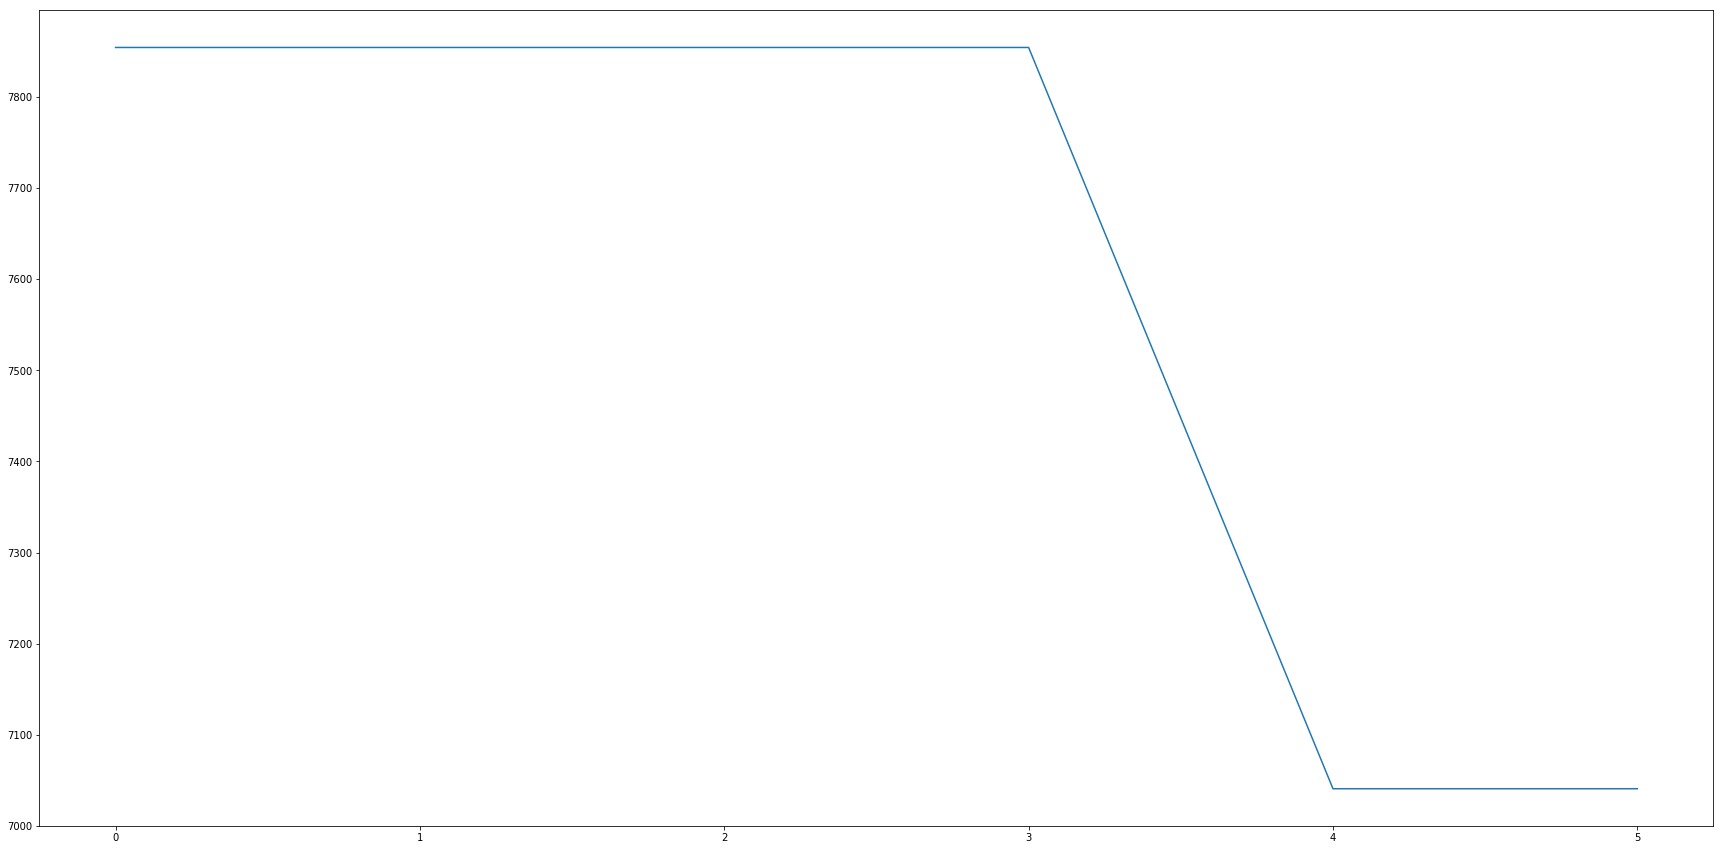

In [39]:
PlotCost(historicBestScore)